In [1]:
import sys
ars_path = "/home/boittier/pydcm/"
sys.path.insert(1, ars_path)
from _pydcm import *


In [2]:
__name = "azide"

# The Gaussian-format cube file containing electron density:
refDensCube=f"/home/boittier/test_systems/{__name}/{__name}.chk.d.cube"
# The Gaussian-format cube file containing electrostatic potential energy:
refPotCube=f"/home/boittier/test_systems/{__name}/{__name}.chk.p.cube"
# The root folder for your fitting project
projDir=f"/home/boittier/pydcm/models/{__name}"
# The bin directory containing the MDCM scripts and programs
refBinDir="/home/boittier/pydcm/bin"
# The total charge of the molecule to be fitted (a.u.)
qtot=0.0
# The port to use for the local web browser (to view molecules in NGL). Make sure nobody else is using it already!
webPort='8886'
# The name of a Slurm partition allowing jobs to run for up to 2 hours with 4 cores
shortQ='short'
longQ='long'
# The desired isodensity surface to use for viewing potential energy surfaces (a.u)
isoSurf=0.001


# Number of refinement iterations for each fit. More is better, but each fit will take longer
ntry=1
# Maximum number of charges to fit per atom (minimum is fixed at 1)
maxAChg=2

natm=7
nfrag = 1

minMChg=7
maxMChg=14

# Define fragments using atom numbering from NGL window at top of notebook
frags= [[1, 2, 3, 4, 5, 6, 7]] 
# Minimum number of charges to fit for each fragment (can average fewer than 1 per atom)
minFChg=[7]
# Maximum number of charges to fit for each fragment (upper limit per atom fixed by maxAChg)
maxFChg=[14]

workdir = projDir + '/'
refdir = workdir + 'ref/'
htmldir = workdir + 'html/'
bindir = refBinDir + '/'
pdbfile = refdir + 'mol.pdb'
densCube = refdir + os.path.basename(refDensCube)
potCube = refdir + os.path.basename(refPotCube)

In [3]:
pydcm = Pydcm(projDir, refBinDir, refDensCube, refPotCube, webPort, frags, minFChg, maxFChg, maxAChg, minMChg, maxMChg, shortQ, longQ)

In [4]:
pydcm.make_ref_directory()
pydcm.start_server()

Changed to working directory /home/boittier/pydcm/models/azide/
7 atoms in molecule
writing PDB file /home/boittier/pydcm/models/azide/ref/mol.pdb

Running jobs:
0 : run_http()

Web server running in directory /home/boittier/pydcm/models/azide, URLs are relative to this path
If you change the project directory, you need to restart Jupyter-Lab to restart this server and create a new root for URLs


In [5]:
pydcm.show_ref_models()

python /home/boittier/pydcm/bin/simple-cors-http-server.py 8886
ESP range: -0.037149 to 0.037149 a.u.
8886 /home/boittier/pydcm/models/azide/html/ /home/boittier/pydcm/models/azide/ref/mol.pdb
http://localhost:8886/html/refESP.html


Traceback (most recent call last):
  File "/home/boittier/pydcm/bin/simple-cors-http-server.py", line 11, in <module>
    test(CORSRequestHandler, HTTPServer, port=int(sys.argv[1]) if len(sys.argv) > 1 else 8000)
  File "/home/boittier/miniconda3/lib/python3.8/http/server.py", line 1249, in test
    with ServerClass(addr, HandlerClass) as httpd:
  File "/home/boittier/miniconda3/lib/python3.8/socketserver.py", line 452, in __init__
    self.server_bind()
  File "/home/boittier/miniconda3/lib/python3.8/http/server.py", line 138, in server_bind
    socketserver.TCPServer.server_bind(self)
  File "/home/boittier/miniconda3/lib/python3.8/socketserver.py", line 466, in server_bind
    self.socket.bind(self.server_address)
OSError: [Errno 98] Address already in use


In [6]:
pydcm.display_mtpfit_comparison()

/home/boittier/pydcm/bin/mtpfit.py


slurm_load_jobs error: Invalid job id specified
slurm_load_jobs error: Invalid job id specified
slurm_load_jobs error: Invalid job id specified
slurm_load_jobs error: Invalid job id specified
slurm_load_jobs error: Invalid job id specified
slurm_load_jobs error: Invalid job id specified
slurm_load_jobs error: Invalid job id specified



## 1Charges Per Atom:
Atom 1 final RMSE: 1.211871057 kcal/mol
Atom 2 final RMSE: 1.181406647 kcal/mol
Atom 3 final RMSE: 2.660927968 kcal/mol
Atom 4 final RMSE: 0.4753294589 kcal/mol
Atom 5 final RMSE: 2.648971082 kcal/mol
Atom 6 final RMSE: 0.4737002482 kcal/mol
Atom 7 final RMSE: 1.487511946 kcal/mol

## 2Charges Per Atom:
Atom 1 final RMSE: 1.071843765 kcal/mol
Atom 2 final RMSE: 0.7799511135 kcal/mol
Atom 3 final RMSE: 1.693697918 kcal/mol
Atom 4 final RMSE: 0.2619295556 kcal/mol
Atom 5 final RMSE: 0.22159455 kcal/mol
Atom 6 final RMSE: 0.393106128 kcal/mol
Atom 7 final RMSE: 0.3849246387 kcal/mol


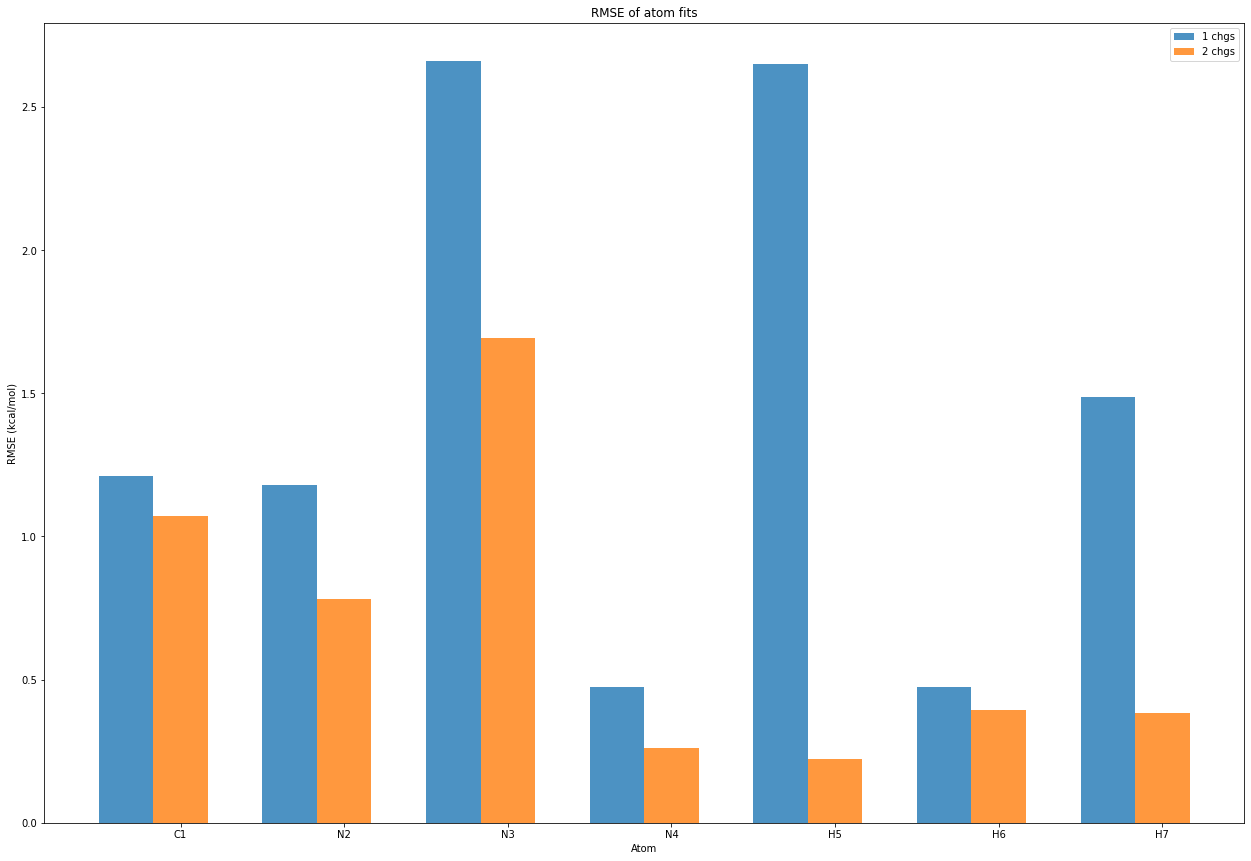

In [7]:
pydcm.do_atom_fit(maxAChg, ntry, nfrag)

In [10]:
# Number of refinement iterations for each fit. More is better, but each fit will take longer
ntry=1
# Number of separate fits to perform (restarting a fit can lead to a better outcome). Cost scales linearly
nfit=1

pydcm.fit_fragments(ntry, nfit)

slurm_load_jobs error: Invalid job id specified
slurm_load_jobs error: Invalid job id specified
slurm_load_jobs error: Invalid job id specified


Frag 1 fit 1, 13 charges: Job 636665 is still running
Frag 1 fit 1, 14 charges: Job 636666 is still running
Frag 1 fit 1, 15 charges: Job 636667 is still running


slurm_load_jobs error: Invalid job id specified
slurm_load_jobs error: Invalid job id specified


False

In [9]:
pydcm.combine_fragements(ntry, nfit)

7 CHARGES:


TypeError: 'float' object is not subscriptable


Summary of results:
10 charges, RMSE: 1.045341076 kcal/mol
11 charges, RMSE: 1.069072232 kcal/mol
12 charges, RMSE: 1.014872451 kcal/mol
13 charges, RMSE: 0.9753178193 kcal/mol
14 charges, RMSE: 0.8574946602 kcal/mol
15 charges, RMSE: 0.7877106442 kcal/mol
16 charges, RMSE: 0.6631946022 kcal/mol
17 charges, RMSE: 0.6690097627 kcal/mol
18 charges, RMSE: 0.6313166616 kcal/mol
19 charges, RMSE: 0.5688686855 kcal/mol
20 charges, RMSE: 0.5360864516 kcal/mol
21 charges, RMSE: 0.5309868844 kcal/mol
22 charges, RMSE: 0.5193661433 kcal/mol
23 charges, RMSE: 0.5136091996 kcal/mol
24 charges, RMSE: 0.5100842174 kcal/mol
25 charges, RMSE: 0.5072128325 kcal/mol
26 charges, RMSE: 0.5145492169 kcal/mol
27 charges, RMSE: 0.5109058541 kcal/mol
28 charges, RMSE: 0.5088203305 kcal/mol
29 charges, RMSE: 0.5060637883 kcal/mol
30 charges, RMSE: 0.5089921728 kcal/mol
31 charges, RMSE: 0.5073012353 kcal/mol
32 charges, RMSE: 0.507437606 kcal/mol
33 charges, RMSE: 0.5032474157 kcal/mol
34 charges, RMSE: 0.503

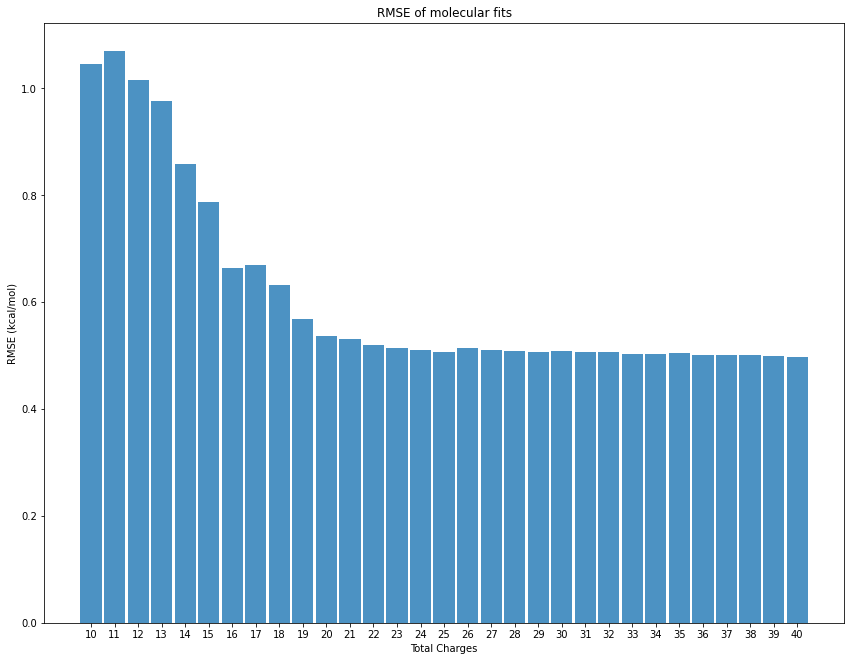

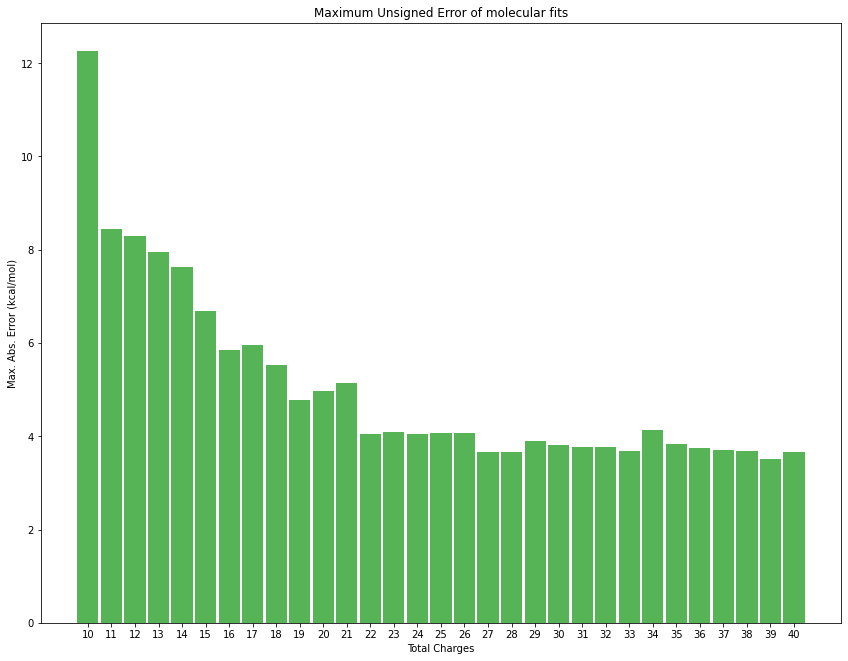

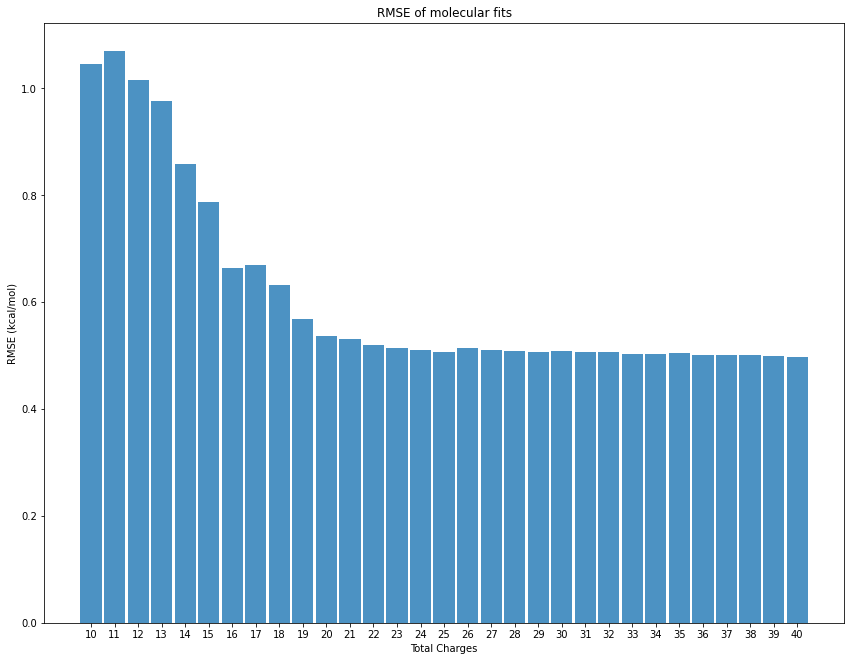

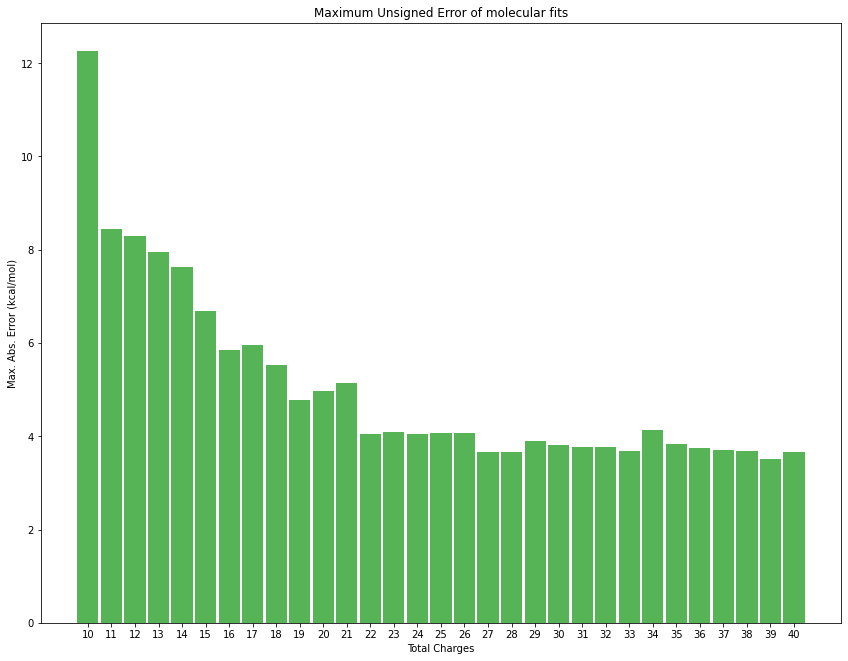

In [10]:
pydcm.refine_models()

Ditriantapole RMSE: 3.799888416E-01
0.04845684579
Monopole RMSE: 8.029232540E-01
0.206634443
satisfied
Quadrupole RMSE: 3.806049986E-01
0.04876728984
20 charge model RMSE: 4.104549475E-01
0.06484723241
[0.3799888416, 0.8100493809, 0.122851282, 0.04845684579, 0.802923254, 1.586146251, 0.5155074333, 0.206634443, 0.3806049986, 0.8112678472, 0.1233018696, 0.04876728984, 0.4104549475, 0.8621458337, 0.169165466, 0.06484723241]


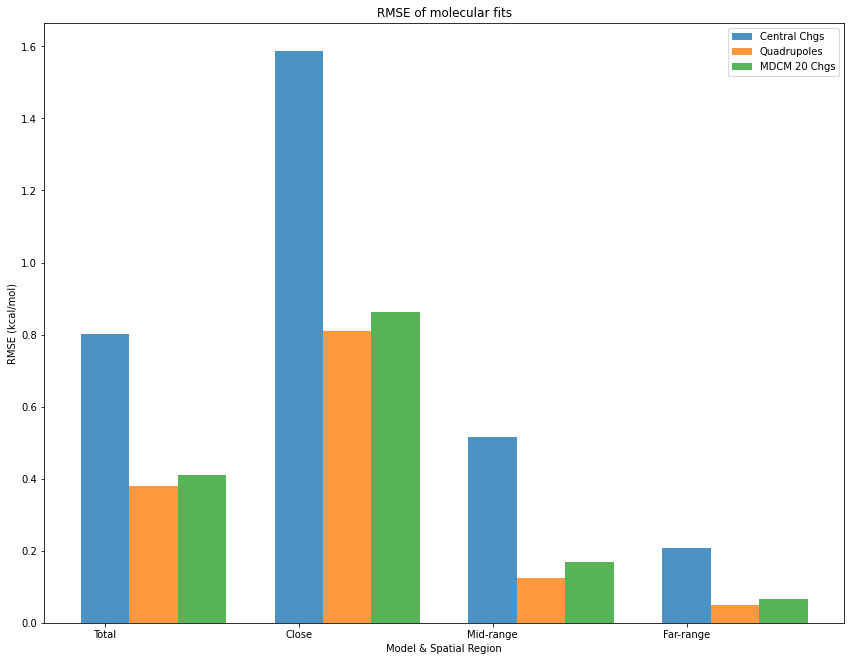

NameError: name 'densCube' is not defined

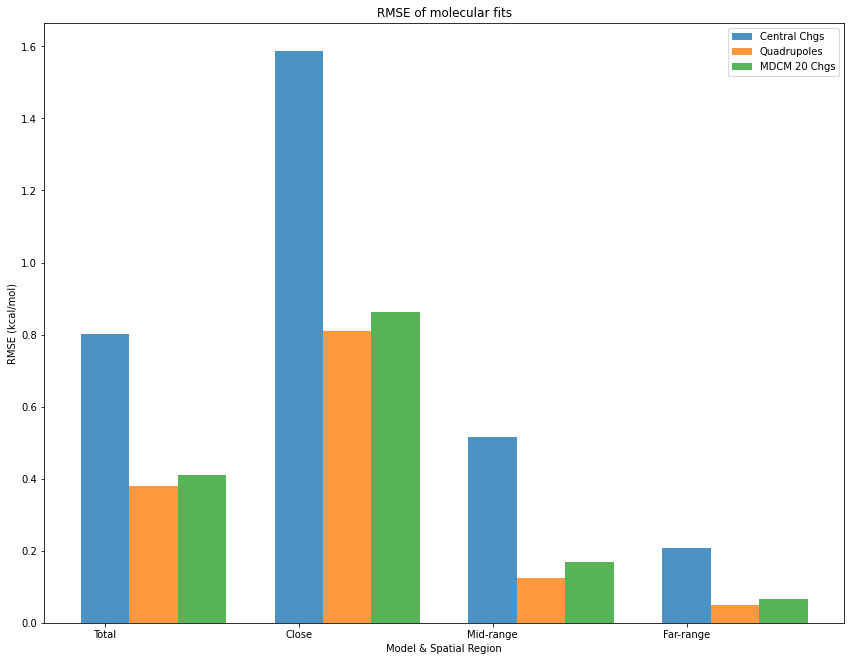

In [11]:
pydcm.analyse_model(20)

In [ ]:
pydcm.refinedir